In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
data_path = '/home/giles/Projects/pyShapelets/pyshapelets/data/partitioned/SonyAIBORobotSurface2/SonyAIBORobotSurface2_{}.csv'
train = pd.read_csv(data_path.format('train'))
test = pd.read_csv(data_path.format('test'))

X_train = train.drop('target', axis=1)
y_train = train['target']
X_test = test.drop('target', axis=1)
y_test = test['target']

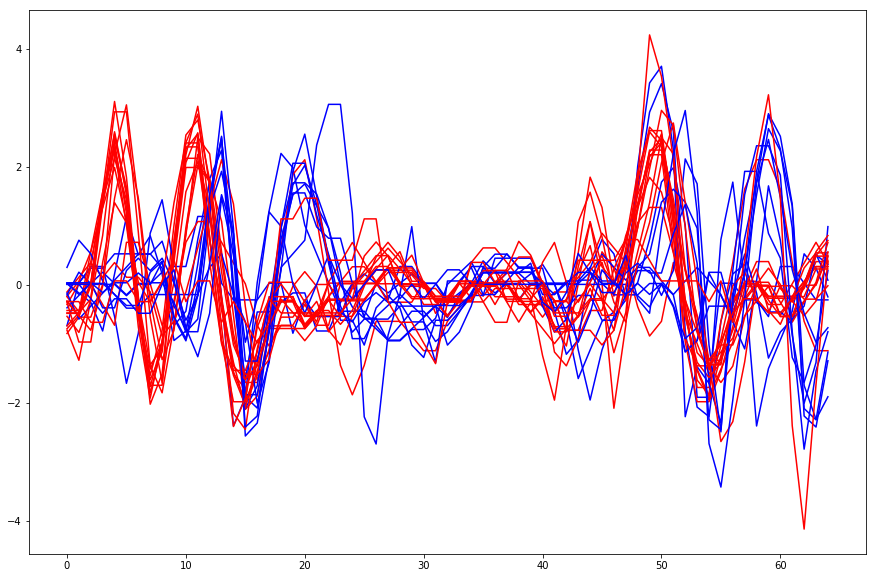

In [10]:
cmap = {1: 'b', 2: 'r'}
plt.figure(figsize=(15, 10))
for ts, label in zip(X_train.values, y_train):
    plt.plot(ts, c=cmap[label])
plt.show()

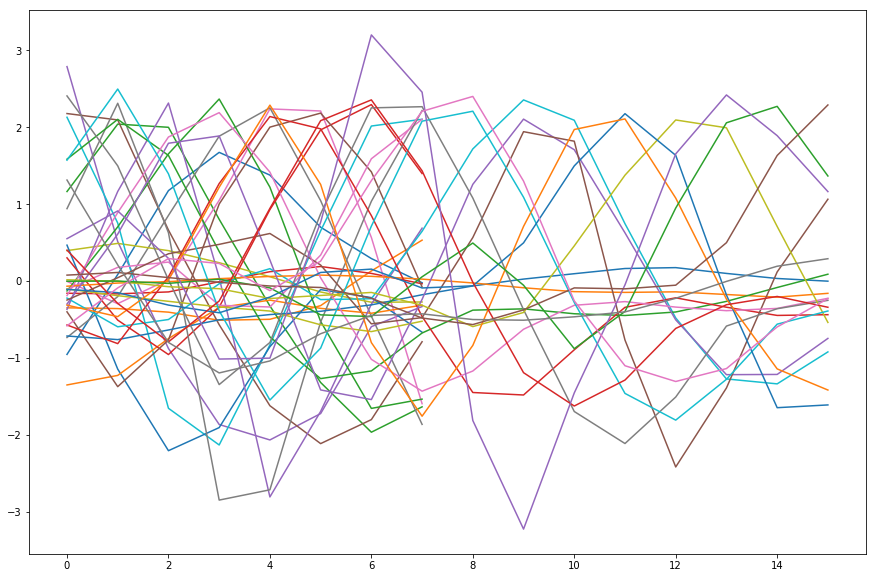

In [25]:
import numpy as np
import re
import numpy
import ast

pattern = r'''# Match (mandatory) whitespace between...
              (?<=\]) # ] and
              \s+
              (?= \[) # [, or
              |
              (?<=[^\[\]\s]) 
              \s+
              (?= [^\[\]\s]) # two non-bracket non-whitespace characters
           '''

shap_path = '/home/giles/Projects/pyShapelets/pyshapelets/results/lts_vs_genetic/SonyAIBORobotSurface2_{}_shapelets.txt'
learned_shaps = shap_path.format('learned')
genetic_shaps = shap_path.format('genetic')
with open(learned_shaps, 'r') as ifp:
    array_string = ifp.read()
    
    # Replace such whitespace with a comma
    fixed_string = re.sub(pattern, ',', array_string, flags=re.VERBOSE)

    output_array = numpy.array(ast.literal_eval(fixed_string))
    shaps = []
    for x in output_array:
        shap = []
        for y in x:
            shap.append(y[0])
        shaps.append(shap)
plt.figure(figsize=(15, 10))
for ts in shaps:
    plt.plot(ts)
plt.show()

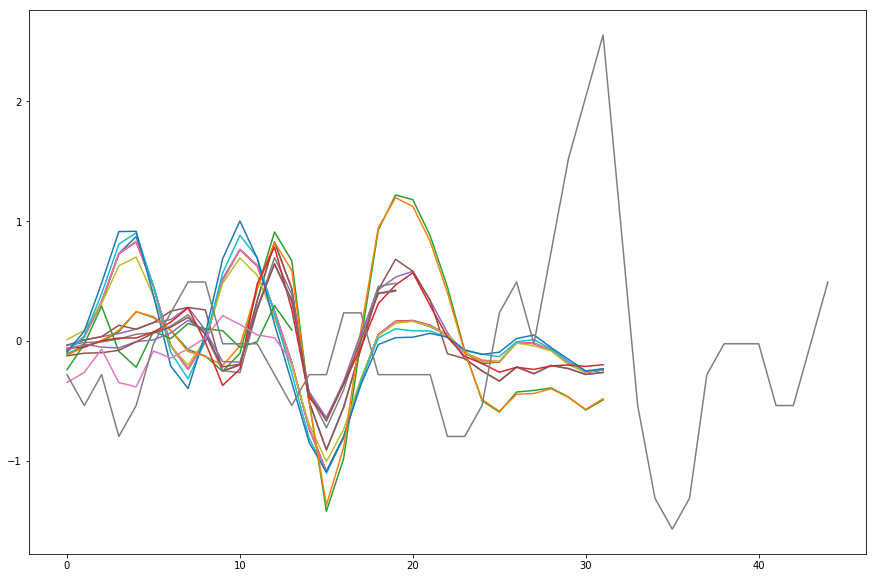

In [29]:
with open(genetic_shaps, 'r') as ifp:
    array_string = ifp.read()
    
    # Replace such whitespace with a comma
    fixed_string = re.sub(pattern, ',', array_string, flags=re.VERBOSE)

    shaps = numpy.array(ast.literal_eval(fixed_string))
plt.figure(figsize=(15, 10))
for ts in shaps:
    plt.plot(ts)
plt.show()